# プロローグ - 研究室初日

君は大学院に進み、Dr.リョウコのもと、研究室での初日を迎える。<br/>
予定の時刻にDr.リョウコの研究室に到着したあなたは、<br/>
まだ誰もいない部屋で教授の到着を待つ。

手持ち無沙汰で研究室の部屋の中を歩き回っていると、近くのモニターが突然点灯する。<br/>
（モーションセンサーで作動するのか・・・）<br/>
そこに映っていたのはDr.リョウコだった。<br/>

Dr.リョウコは君に短く挨拶すると、いま別の研究所に来ていること、<br/>
そして現在仕掛け中の実験データを集めるために、しばらくはそこを離れることができないことを説明する。<br/>そのため、戻るまではウェブで時々コミュニケーションを取りながら、自習を進めて欲しいとのことだった。

[<< クリックしてDr.リョウコとウェブカメラを通じてコミュニケーションを取る>>](https://youtu.be/eLw7fWb2xv4)

# Week1-A: 量子回路における加算器
この週では、まず、量子回路を用いて単純な古典計算(加算)を行います。

さまざまな論理ゲート（AND、OR、XORなど）を組み合わせて古典計算で加算器を作成できるのと同じように、量子回路でも加算器を作成することもできます。

演習を開始する前に、下の最初のセルをクリックして「shift」+「enter」を押して実行してください。 これは、Jupyter Notebookの環境でコードセルを実行する一般的な方法です。 実行中は、そのセルの左上に[*]：が表示されます。 実行が終了すると、実行したセルの数を示す星の代わりに数字が表示されます。 Jupyter Notebookの詳細については、Qiskit Textbookのこちらの章をご覧ください：[Python and Jupyter Notebooks](https://github.com/qiskit-community/qiskit-textbook/blob/master-ja/content/ch-prerequisites/python-and-jupyter-notebooks.ipynb)

In [50]:
# 標準のQiskitライブラリーをインポートしてアカウントを構成する
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_bloch_multivector

# このコードをIBM Quantum Experience以外の環境で実行する場合には、
# あなたのAPIトークンをローカルに保存するために以下のコマンドを実行してください。
# Please refer https://qiskit.org/documentation/install.html#access-ibm-quantum-systems
# IBMQ.save_account('MY_API_TOKEN')

# IBM Q アカウントをロードします
IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-11-09 10:40:06,236: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### 量子回路とは？

量子回路は、量子計算の過程を記述する手法の１つで、基本的な操作を行う量子ゲートを組み合わせて構成されます。まず、いくつかの主要な量子ゲートをご紹介します。

### Xゲート
Xゲートはブロッホ球の$x$軸周りの$\pi$回転です。
|0>にXゲートを適用すると|1>、|1>にXゲートを適用すると|0>になるので、古典のNOTゲートのような操作が実現でき、ビット反転とも呼ばれます。<br/>線形代数について学習したい方はQiskit Textbookのこちらの章をご覧ください：[Linear Algebra](https://github.com/qiskit-community/qiskit-textbook/blob/master-ja/content/ch-appendix/linear_algebra.ipynb)

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

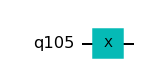

In [51]:
# |0> qubitにXゲートをかけます
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q[0])
qc.draw(output='mpl')

注：新表記では`QuantumRegister`を省略するコーディング方法もありますが、今回のChallengeでは、こちらのコーディング法を使います。複雑な量子回路のアルゴリズムを理解しやすくするためです。（新表記についてはこちらをご覧ください：https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html?highlight=quantumcircuit#qiskit.circuit.QuantumCircuit）

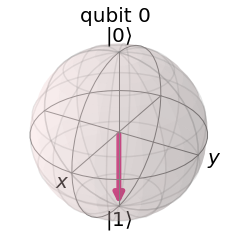

In [52]:
# 結果を見てみましょう
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### Hゲート
Hadamardゲート(アダマールゲート)はブロッホ球の$x$軸と$z$軸の中間の軸周りの$\pi$回転です。
例えば$|0\rangle$にHゲートを適用すると、$\frac{|0\rangle + |1\rangle}{\sqrt{2}}$のような重ね合わせ状態（測定すると0または1になる確率が等しい状態）を作ることができます。この状態は$|+\rangle$とも表記されます。

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

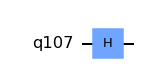

In [53]:
# |0> qubitにHゲートをかけてみましょう
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.draw(output='mpl')

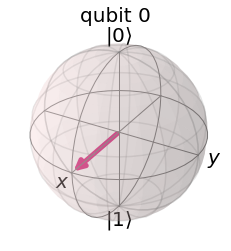

In [54]:
# 結果を見てみます
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### Zゲート
Zゲートはブロッホ球の$z$軸周りの$\pi$回転です。位相反転とも呼ばれます。

$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$

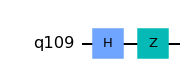

In [55]:
# |+>にZゲートをかけてみましょう
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.z(q[0])
qc.draw(output='mpl')

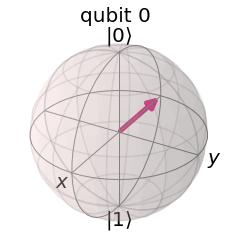

In [56]:
# 結果を見てみます
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result().get_statevector(qc, decimals=3)
plot_bloch_multivector(result)

### CXゲート(CNOTゲート)
CXゲートは制御NOTゲート、CNOTとも呼ばれます。CXゲートは、２つの量子ビット(制御量子ビットとターゲット量子ビットと呼びます)を入出力に持ち、制御量子ビットが$|1\rangle$のときに、ターゲット量子ビットに対してビット反転(Xゲート)を行います。(Qiskitでは、番号の大きい量子ビットほど高い位のビット数に対応しています。つまり、右から順に番号付けされます。)

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}$

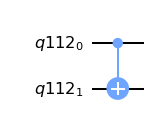

In [57]:
# |00>にCXゲートをかけてみましょう
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw(output='mpl')

### CZゲート
CZゲートも、２つの量子ビット(制御量子ビットとターゲット量子ビットと呼びます)を入出力に持ち、制御量子ビットが$|1\rangle$のときに、ターゲット量子ビットに対して位相反転(Zゲート)を行います。

$CZ = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1\\
\end{pmatrix}$

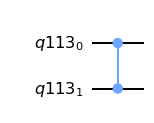

In [58]:
# |00>にCZゲートをかけてみましょう
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
qc.draw(output='mpl')

なお、CZゲートはCXゲートとHゲートから作ることができます。

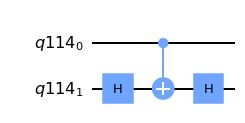

In [59]:
# CZゲートをCXゲートとHゲートから作ります
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[1])
qc.cx(q[0],q[1])
qc.h(q[1])
qc.draw(output='mpl')

### CCXゲート
CCXゲートはToffoliゲートとも呼ばれます。

CCXゲートは、3つの量子ビット(2つの制御量子ビットと1つのターゲット量子ビット)を入出力に持ち、制御量子ビットが2つとも$|1\rangle$ のときに、ターゲット量子ビットに対してビット反転(Xゲート)を行います。(Qiskitでは、右から順に番号付けされることに注意してください。)

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
\end{pmatrix}$

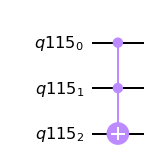

In [60]:
# |00>にCCXゲートをかけてみましょう
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.ccx(q[0],q[1],q[2])
qc.draw(output='mpl')

その他の量子ゲートの詳細に関しては[Single Qubit Gates](https://qiskit.org/textbook/ch-states/single-qubit-gates.html) をご覧ください。

## 古典の論理ゲートを量子ゲートで作成する
古典の論理ゲートを量子ゲートで作成してみましょう。
真理値表と量子回路による表現を以下に示します。なお、量子レジスタをq、古典レジスタをcとし、測定結果を作成する論理ゲートの出力とします。

### NOTゲート
先述の通り、XゲートをNOTゲートとみなすことができます。 真理値表は以下のようになります。


|入力|出力|
|--|--|
|0|1|
|1|0|

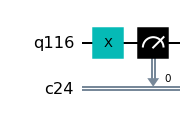

In [61]:
# 量子レジスター1個と古典レジスター1個の量子回路を作成する
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.measure(q[0], c[0])    # 測定した結果を古典ビットにマップする
qc.draw(output='mpl')

### ANDゲート
ANDゲートの真理値表は以下のようなものです。

|入力A|入力B|出力|
|--|--|--|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

CCXゲートを用いると、制御量子ビット2つに対するANDゲートの結果をターゲット量子ビットに得られます。

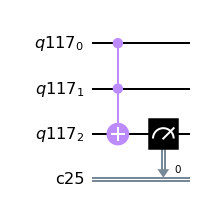

In [62]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### NANDゲート
NANDゲートはANDゲートにNOTゲートを適用したものと捉えることができます。

|入力A|入力B|出力|
|--|--|--|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

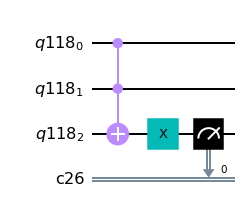

In [63]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### ORゲート

|入力A|入力B|出力|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

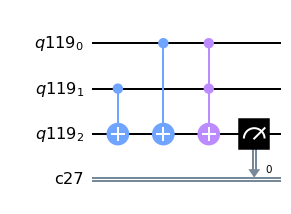

In [64]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### XORゲート
|入力A|入力B|出力|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

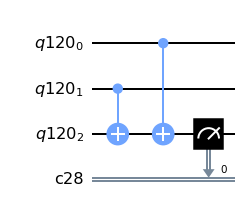

In [65]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### NORゲート 

|入力A|入力B|出力|
|--|--|--|
|0|0|1|
|0|1|0|
|1|0|0|
|1|1|0|

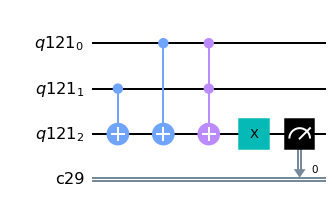

In [66]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

# 加算器

加算器は足し算を行う論理回路です。

今回は最もシンプルな加算器である半加算器と全加算器を用いた加算器に関して考えます。

## 半加算器
半加算器は、２進数を2つ与えられたとき、一番下の位の値どうしの加算を行います。
1ビットの情報2つ(入力A,B)が入力として与えられ、桁上げ出力(Carry out)、出力（Sum、和）の２つを出力に持ちます。
この桁上げ出力の情報は、後述の全加算器の入力の１つとして１つ上の位の値を求めるために用いられます。


半加算器は以下の様な真理値表の論理回路で表すことができます。

|入力A|入力B|出力S|桁上げ出力C|
|-----------|------------|------------|------------|
|0|0|0|0|
|0|1|1|0|
|1|0|1|0|
|1|1|0|1|

この真理値表を見ると、桁上げ出力Cは入力Aと入力Bに対してANDを適用したものであること、出力Sは入力Aと入力Bに対してXORを適用したものであることがわかります。
ANDとXORに関してはすでに作成済みなので、以下のように組み合わせて半加算器の量子回路が作成できます。

なお、量子レジスタをq, 古典レジスタcとし、入力A, Bをq[0],q[1]に、出力S,桁上げ出力C,をq[2], q[3]に割り振ります。
また、出力結果はc[1], c[0]の順になっていることに注意して下さい。

{'00': 1000}


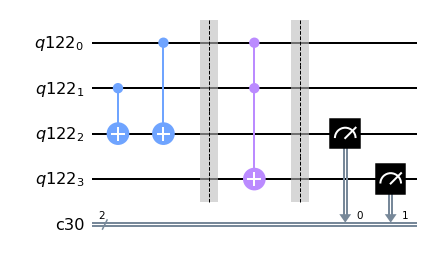

In [67]:
#各レジスター、量子回路を宣言
q = QuantumRegister(4)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

#XOR
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.barrier()

#AND
qc.ccx(q[0], q[1], q[3])
qc.barrier()

#Sum
qc.measure(q[2], c[0])
#Carry out
qc.measure(q[3], c[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

## <span style="color: red; ">重要: Unrollerを用いた量子コストの導出</span>
プログラム(量子回路)を評価する手法がいくつか存在します。

1. 量子ビット数
2. 深さ
3. 実行速度
4. 命令数

これらはどれも量子計算の結果やスループットなどに影響する重要な尺度ですが、今回のQuantum Challengeでは特に4の命令数を指標として、以下のようにプログラムを評価しています。今回の手法で用いる値をコストと呼称します。

コスト $=$ 単一量子ビットゲートの数 $+$ CXゲートの数 $\times 10$

任意の量子回路は単一量子ビットゲート(1量子ビットに対する命令)と2量子ビットゲートに対する命令に分解できます。現在のノイズの多い中規模量子デバイス（NISQ）では、CXゲートのエラー率は一般に単一量子ビットゲートの10倍です。よって、コストでは、CXゲートの重みづけを単一量子ビットゲートの10倍にします。

unrollerと呼ばれるプログラムを用いることで、皆さんのお手元でもこのコストを導出することができます。
例えば、以下のような量子回路があったとします。

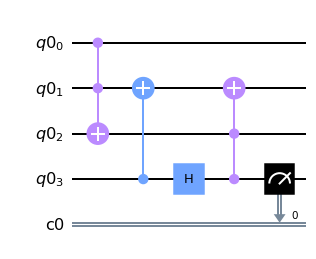

In [68]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, process_fidelity
q = QuantumRegister(4, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.cx(q[3], q[1])
qc.h(q[3])
qc.ccx(q[3], q[2], q[1])
qc.measure(q[3],c[0])
qc.draw(output='mpl')

In [69]:
qc.count_ops()

OrderedDict([('ccx', 2), ('cx', 1), ('h', 1), ('measure', 1)])

この量子回路にはHゲート、CXゲート、CCXゲートが入っています。qiskit.transpilerを使ってPassManagerをインポートすることで、以下のようにUnrollerによって指定されたゲートに分解できます。この場合では、u3ゲートとcxゲートに分解します。

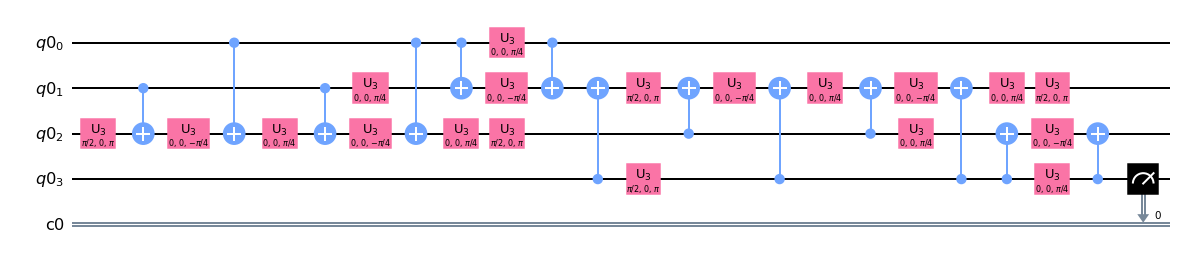

In [70]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [71]:
new_circuit.count_ops()

OrderedDict([('u3', 19), ('cx', 13), ('measure', 1)])

よって、この回路のコストは$19+13\times10=149$ということになります。

単一量子ビットゲートやCXゲート以外のゲートが、Unrollerによってどのように分解されるかは簡単に確認できるので、興味がある人は自分で調べてみましょう。以下ではサンプルとして、CCXゲートをu3ゲートとCXゲートに分解しています。

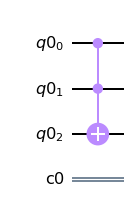

In [72]:
q = QuantumRegister(3, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.draw(output='mpl')

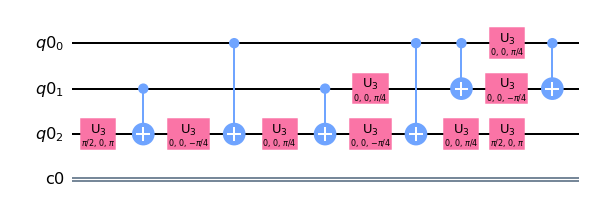

In [73]:
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [74]:
new_circuit.count_ops()

OrderedDict([('u3', 9), ('cx', 6)])

上記の回路のコストは$9+6\times10=69$ということになります。

# ラーニング演習 I-A
全加算器は、下の位からの桁上げを含む加算器である。
全加算器を量子回路で表現し、

$A=1$, $B=0$, $X=1$

の時の結果を出力せよ。なお、真理値表は以下のようになる。

|入力A|入力B|桁上げ入力X|出力S|桁上げ出力C|
|--|--|--|--|--|
|0|0|0|0|0|
|0|0|1|1|0|
|0|1|0|1|0|
|0|1|1|0|1|
|1|0|0|1|0|
|1|0|1|0|1|
|1|1|0|0|1|
|1|1|1|1|1|


なお、量子レジスタをq, 古典レジスタcとする。また、入力A, B, 桁上げ入力Xをそれぞれq[0], q[1], q[2]に与えられるものとし、測定結果のc[0]に出力S、c[1]に桁上げ出力Cが出力されるようにすること。

{'10': 1000}


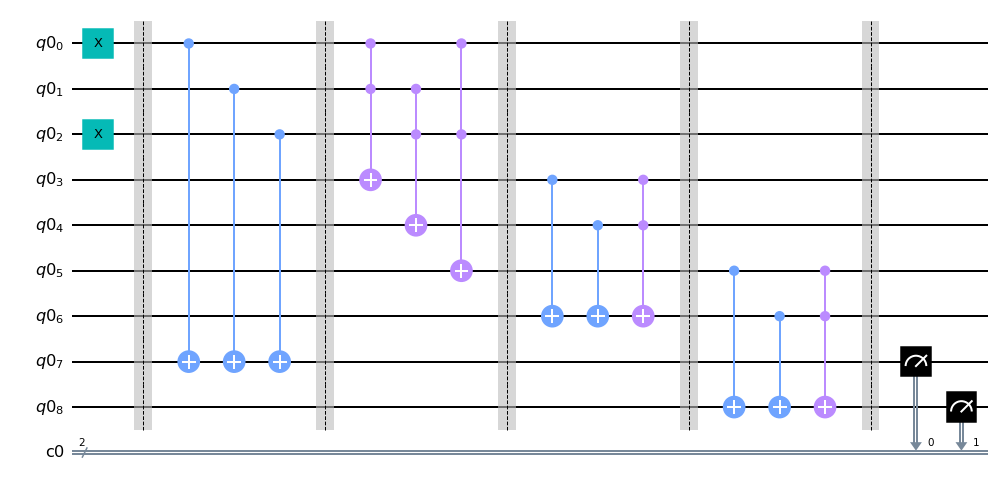

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

##### ここに量子回路を作成してください。
q = QuantumRegister(9) #0:A, 1:B, 2:X, 3:A&B, 4:B&X, 5:X&A, 6:(A&B)|(B&X), 7:S, 8:C
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)
A = 0
B = 1
C = 8
X = 2
AB = 3
BX = 4
XA = 5
S = 7
ABorBX = 6

#INPUT
qc.x(q[A])
#qc.x(q[B])
qc.x(q[X])
qc.barrier()
#XOR
qc.cx(q[A], q[S])
qc.cx(q[B], q[S])
qc.cx(q[X], q[S])
qc.barrier()

#AND
qc.ccx(q[A], q[B], q[AB])
qc.ccx(q[B], q[X], q[BX])
qc.ccx(q[X], q[A], q[XA])
qc.barrier()


#OR
qc.cx(q[AB], q[ABorBX])
qc.cx(q[BX], q[ABorBX])
qc.ccx(q[AB], q[BX], q[ABorBX])
qc.barrier()

#OR
qc.cx(q[XA], q[C])
qc.cx(q[ABorBX], q[C])
qc.ccx(q[XA], q[ABorBX], q[C])
qc.barrier()
qc.measure(q[S], c[0])
qc.measure(q[C], c[1])
# qasm_simulatorを使って回路を実行させてください。
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

In [2]:
# 以下を実行して解を確認してください。
from qc_grader import grade_ex1a
grade_ex1a(qc)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 417.
Feel free to submit your answer.


In [3]:
# 以下を実行して提出してください。期間中は何度でも再提出できます。
from qc_grader import submit_ex1a
submit_ex1a(qc)

Submitting your answer. Please wait...

Success 🎉! Your answer has been submitted.
